Trying HMC in python environment

In [1]:
import numpy as np

In [2]:
def action(lattice, params):
    neighbor_sum = np.roll(lattice, 1, axis=0)+np.roll(lattice, -1, axis=0)+np.roll(lattice, 1, axis=1)+np.roll(lattice, -1, axis=1)
    site_action = -2*params[0]*lattice*neighbor_sum +lattice**2+params[1]*(lattice**2-1)**2
    return np.sum(site_action)

def hamiltonian(lattice, momentum, params):
    return np.sum(momentum**2/2)+action(lattice, params)

def derivative_term(lattice, params):
    neighbor_sum = np.roll(lattice, 1, axis=0)+np.roll(lattice, -1, axis=0)+np.roll(lattice, 1, axis=1)+np.roll(lattice, -1, axis=1)
    return -2*params[0]*neighbor_sum+2*lattice+4*params[1]*lattice*(lattice**2-1)

def leap_frog(time_step, lattice, params):
    momentum = np.random.normal(size = np.shape(lattice))
    old_H = hamiltonian(lattice, momentum, params)
    lattice += time_step/2*momentum
    momentum -= time_step*derivative_term(lattice, params)
    lattice += time_step/2*momentum
    new_H = hamiltonian(lattice, momentum, params)
    return lattice, new_H-old_H

def HMC(time_step, lattice, params):
    new_lattice, delta_H = leap_frog(time_step, lattice, params)
    
    if delta_H<0:
        lattice = new_lattice
        success = True
    else:       
        acceptance_ratio = min(1, np.exp(-delta_H))
        if np.random.rand() < acceptance_ratio:
            lattice = new_lattice
            success = True
        else:
            success = False
    return lattice, success
    
def HMC_experiment(time_step, lattice, params, data_count, thermalize_step):
    counter = 0
    result = np.zeros((data_count, 3))
    for i in range(thermalize_step):
        lattice, success = HMC(time_step, lattice, params)
    while counter< data_count:
        lattice, success = HMC(time_step, lattice, params)
        if success == True:
            result[counter, :] = [np.mean(lattice), np.mean(lattice**2), np.mean(lattice**4)]
            counter+=1
    return result

In [88]:
kappa = np.linspace(0.2, 0.4, 50)
lambda_0 =0.2
lattice = np.random.rand(64,64)
time_step = 0.1
data_count = 5000
final_result = np.zeros((50, 8))
counter = 0
for val in kappa:
    print(val)
    result =  HMC_experiment(time_step, lattice, (val, lambda_0), data_count, 10000)
    final_result[counter, :] = [val, lambda_0, *np.mean(result, axis=0), *np.var(result, axis=0)]
    counter+=1


0.2
0.20408163265306123
0.20816326530612245
0.2122448979591837
0.2163265306122449
0.22040816326530613
0.22448979591836737
0.2285714285714286
0.2326530612244898
0.23673469387755103
0.24081632653061225
0.2448979591836735
0.2489795918367347
0.25306122448979596
0.2571428571428572
0.2612244897959184
0.2653061224489796
0.2693877551020408
0.27346938775510204
0.27755102040816326
0.28163265306122454
0.2857142857142857
0.28979591836734697
0.2938775510204082
0.2979591836734694
0.3020408163265306
0.30612244897959184
0.3102040816326531
0.3142857142857143
0.31836734693877555
0.32244897959183677
0.326530612244898
0.3306122448979592
0.3346938775510204
0.33877551020408164
0.34285714285714286
0.34693877551020413
0.3510204081632653
0.35510204081632657
0.3591836734693878
0.363265306122449
0.3673469387755102
0.37142857142857144
0.3755102040816327
0.3795918367346939
0.38367346938775515
0.38775510204081637
0.3918367346938776
0.3959183673469388
0.4


In [4]:
kappa = np.linspace(0.2, 0.4, 50)
lambda_0 =0.2
lattice = np.random.rand(64,64)
time_step = 0.1
data_count = 5000
final_result = np.zeros((50, 8))
counter = 0
for val in kappa:
    print(val)
    result =  HMC_experiment(time_step, lattice, (val, lambda_0), data_count, 10000)
    final_result[counter, :] = [val, lambda_0, *np.mean(result, axis=0), *np.var(result, axis=0)]
    counter+=1


0.2
0.20408163265306123
0.20816326530612245


KeyboardInterrupt: 

In [5]:
lambda_0 = np.arange(0.1, 0.9, 0.1)
data_count = 5000
for val_1 in lambda_0:
    print("lambda value is given", val_1)
    final_result = np.zeros((50, 8))
    counter = 0
    for val_2 in kappa:
        result =  HMC_experiment(time_step, lattice, (val_2, val_1), data_count,  10000)
        final_result[counter, :] = [val_2, val_1, *np.mean(result, axis=0), *np.var(result, axis=0)]
        counter+=1
    np.savetxt('HMC_data/lambda=%.2f.txt' %val_1, final_result)    

lambda value is given 0.1


KeyboardInterrupt: 

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

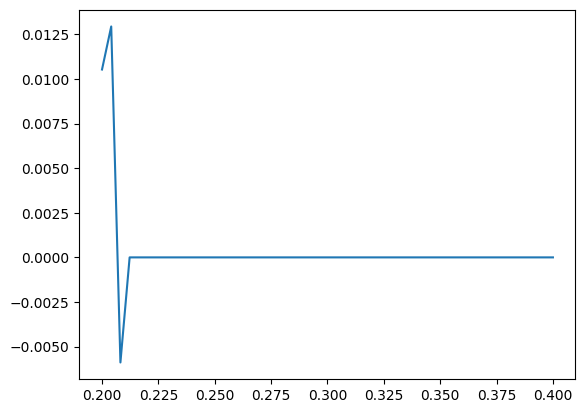

In [8]:
plt.errorbar(kappa, final_result[:, 2]) #yerr = np.sqrt(final_result[:, 3])#
plt.savefig("test.pdf")